In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

from mpl_toolkits.basemap import Basemap

water = pd.read_csv('/Users/caseykeenan/Downloads/4910797b-ee55-40a7-8668-10efd5c1b960.csv')
water.head()
water_results = pd.read_csv('/Users/caseykeenan/Downloads/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')


In [34]:
water_results = pd.read_csv('/Users/caseykeenan/Downloads/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
water_results.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [35]:
table = pd.merge(water,water_results,on='id')
table.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
# I plan to test this table in two ways. The status_group has a functional but needs repairs option. I plan to test this
# with the needs repair group in the functional and non-functional group to see if it lends to different results.

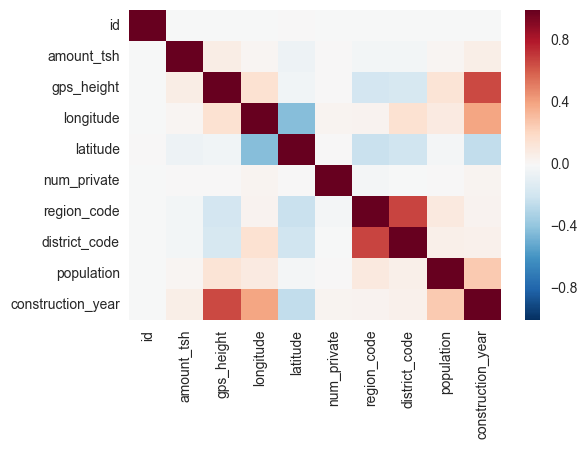

In [6]:
sns.heatmap(table.corr())

In [7]:
table.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
table.isnull().any()

id                       False
amount_tsh               False
date_recorded            False
funder                    True
gps_height               False
installer                 True
longitude                False
latitude                 False
wpt_name                 False
num_private              False
basin                    False
subvillage                True
region                   False
region_code              False
district_code            False
lga                      False
ward                     False
population               False
public_meeting            True
recorded_by              False
scheme_management         True
scheme_name               True
permit                    True
construction_year        False
extraction_type          False
extraction_type_group    False
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_

In [9]:
table.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
# Replace null values with mean or potentially some regression.

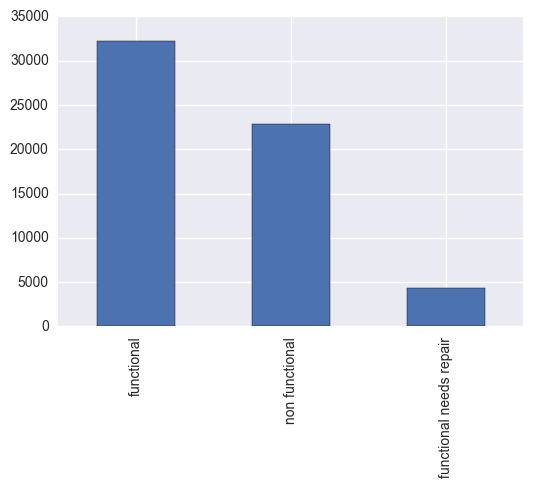

In [10]:
table.status_group.value_counts().plot(kind='bar')

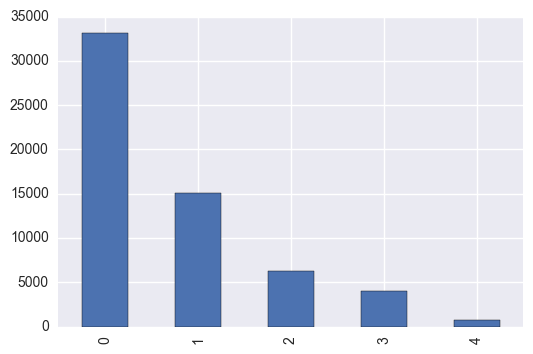

In [48]:
# I want to make this a stacked bar by status_group. Nothing is presenting itself 

table.quantity.value_counts().plot(kind='bar')

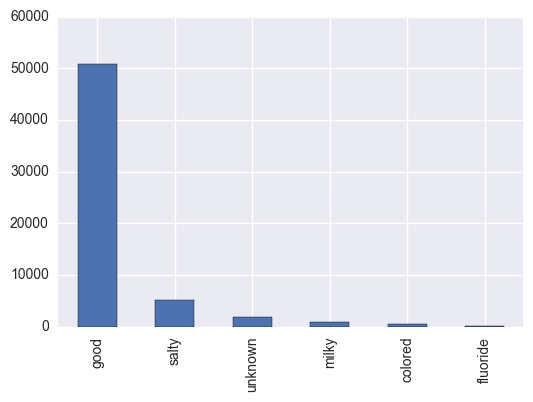

In [12]:
table.quality_group.value_counts().plot(by='status_group',kind='bar')

In [36]:
# First, the functional but needs repairs group will be considered fully functional.

table['status_group'] = table.status_group.map({'non functional':0, 'functional':1, 'functional needs repair':1})
table.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1


In [17]:
table.status_group.value_counts()

1    36576
0    22824
Name: status_group, dtype: int64

In [37]:
table['quality_group'] = pd.factorize(table.quality_group)[0]
table['water_quality'] = pd.factorize(table.water_quality)[0]
table['quantity'] = pd.factorize(table.quantity)[0]
table['quantity_group'] = pd.factorize(table.quantity_group)[0]
table['source'] = pd.factorize(table.source)[0]
table['source_type'] = pd.factorize(table.source_type)[0]
table['source_class'] = pd.factorize(table.source_class)[0]
table['waterpoint_type'] = pd.factorize(table.waterpoint_type)[0]
table['waterpoint_type_group'] = pd.factorize(table.waterpoint_type_group)[0]
table.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,0,0,0,0,0,0,0,0,0,1
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,0,0,1,1,1,1,1,0,0,1
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,0,0,0,0,2,2,1,1,0,1
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,0,0,2,2,3,3,0,1,0,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,0,0,3,3,1,1,1,0,0,1


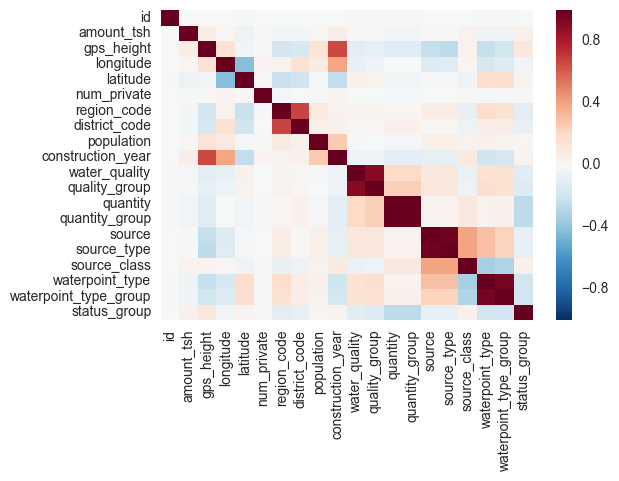

In [19]:
sns.heatmap(table.corr())

In [ ]:
table['status_group'] = table.status_group.dtype('f)

In [40]:
feature_cols = ['quantity_group', 'quality_group', 'source_type', 'construction_year']
X = table[feature_cols]

y = table.status_group

In [21]:
knn = KNeighborsClassifier(5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.71865388376467654

In [41]:
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[0.66528619528619526,
 0.63198653198653199,
 0.68053872053872055,
 0.66681818181818187,
 0.71942760942760942,
 0.68139730639730645,
 0.7218181818181818,
 0.70789562289562291,
 0.73244107744107745,
 0.72220538720538718,
 0.74289562289562294,
 0.74101010101010101,
 0.74336700336700334,
 0.74069023569023573,
 0.74422558922558923,
 0.74217171717171715,
 0.74629629629629635,
 0.73919191919191918,
 0.74631313131313126,
 0.73873737373737369,
 0.74065656565656568,
 0.73949494949494954,
 0.74638047138047137,
 0.74644781144781147,
 0.74664983164983167,
 0.73978114478114476,
 0.74760942760942761,
 0.74718855218855218,
 0.74941077441077442]

In [44]:
feature_cols = ['longitude', 'quality_group', 'waterpoint_type', 'construction_year', 'quantity', 'latitude']
X = table[feature_cols]

In [45]:
knn = KNeighborsClassifier(5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.81984854594887757

In [47]:
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[0.99631313131313126,
 0.90528619528619525,
 0.89976430976430977,
 0.87915824915824914,
 0.87516835016835015,
 0.86604377104377106,
 0.86092592592592587,
 0.85410774410774415,
 0.85048821548821552,
 0.84505050505050505,
 0.84186868686868688,
 0.83787878787878789,
 0.83555555555555561,
 0.83281144781144778,
 0.83074074074074078,
 0.82900673400673397,
 0.82732323232323235,
 0.82552188552188555,
 0.82237373737373742,
 0.82043771043771041,
 0.81742424242424239,
 0.81552188552188554,
 0.8134343434343434,
 0.81240740740740736,
 0.81109427609427609,
 0.80937710437710442,
 0.80833333333333335,
 0.80732323232323233,
 0.80604377104377101]

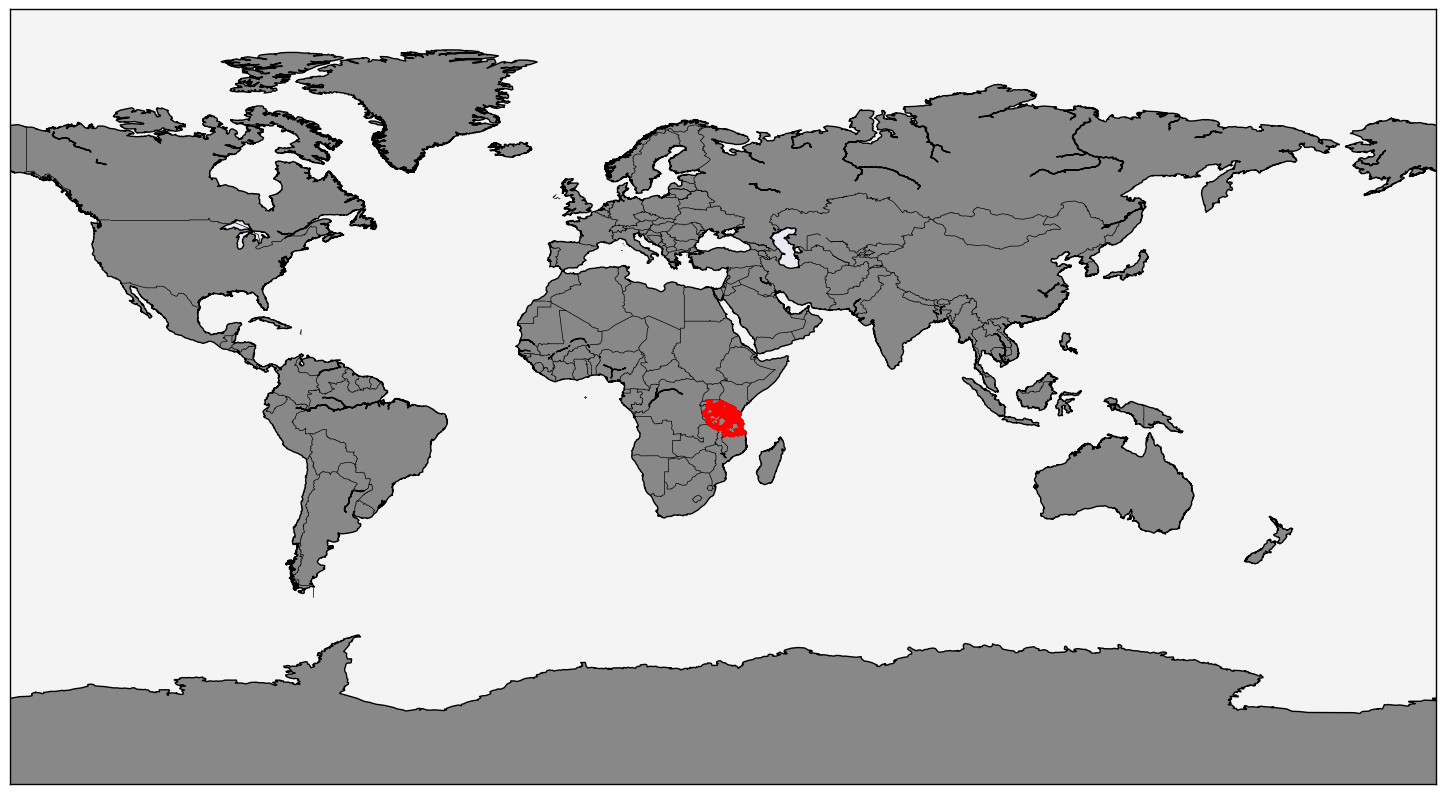

In [26]:
# Let's map this thang.
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=-6.8, lon_0=34.8)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(table['longitude'].values, table['latitude'].values)

# Plot them using round markers of size 1
map.plot(x, y, 'ro', markersize=1)

# Show the map
plt.show()

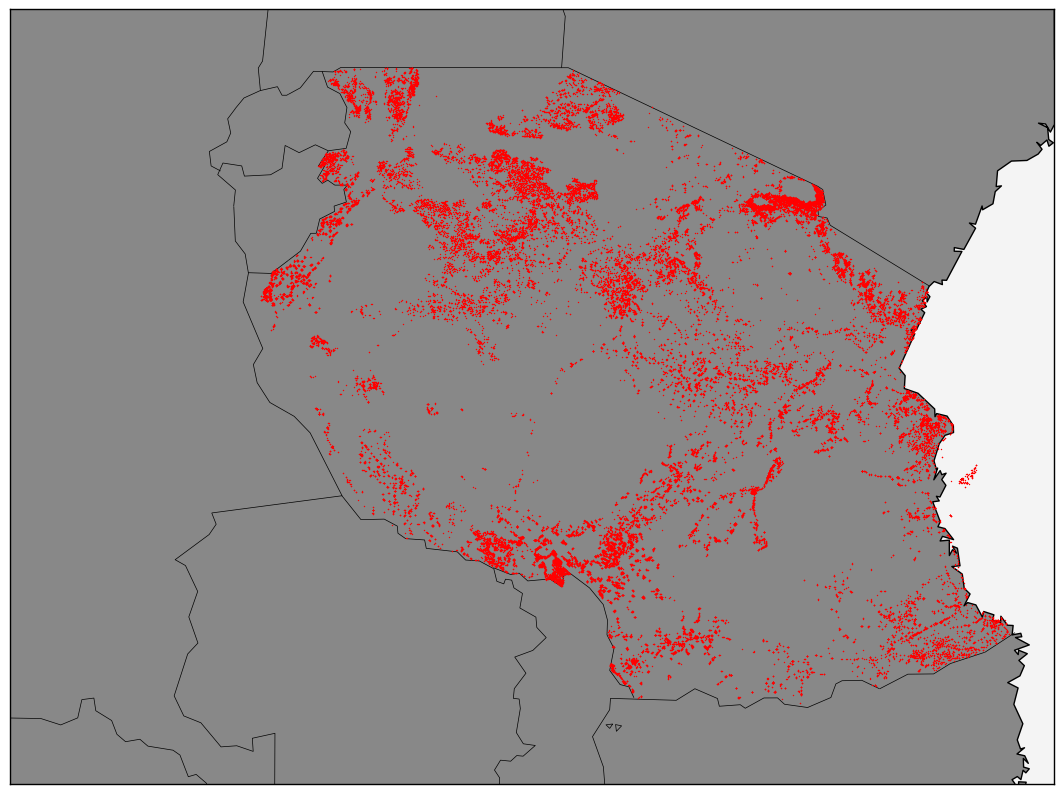

In [27]:
# Enhance!

# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=-6.8, lon_0=34.8,
              llcrnrlon=26., 
              llcrnrlat=-13., 
              urcrnrlon=41., 
              urcrnrlat=-0.013046)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(table['longitude'].values, table['latitude'].values)

# Plot them using round markers of size 1
map.plot(x, y, 'ro', markersize=1)

# Show the map
plt.show()

In [28]:
# Next step is to add topography!

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

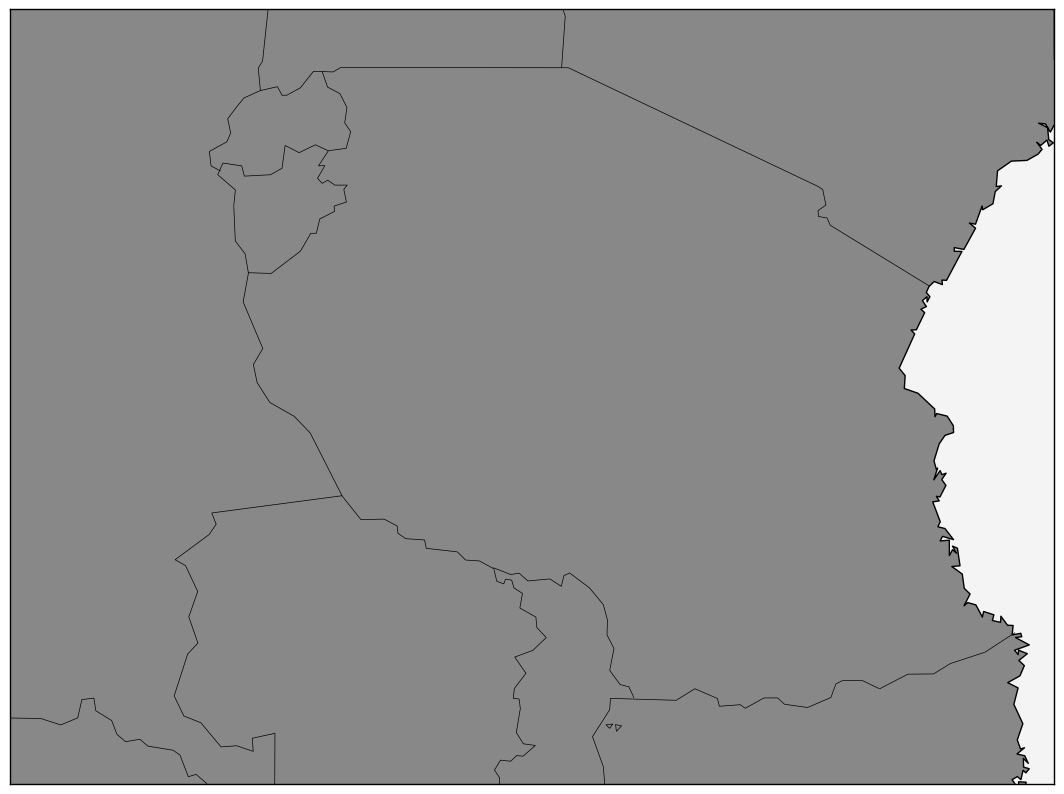

In [29]:
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=-6.8, lon_0=34.8,
              llcrnrlon=26., 
              llcrnrlat=-13., 
              urcrnrlon=41., 
              urcrnrlat=-0.013046)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(table['longitude'].values, table['latitude'].values)

# Plot them using round markers of size 1 and color for functioning or non-functioning

map.plot(x, y, markersize=1)

# Show the map
plt.show()

In [ ]:
# Check out SVM as well for potential models.

In [49]:
null_accuracy_rate = table['status_group'].value_counts()[0] / float(table.shape[0])
null_accuracy_rate

0.38424242424242422

In [52]:
table[['quantity', 'construction_year']].corr()

,quantity,construction_year
quantity,1.000000,-0.099202
construction_year,-0.099202,1.000000
